In [22]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, accuracy_score
import time
from sklearn.linear_model import SGDRegressor

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [4]:
X_train[:,1].shape

(353,)

In [5]:
y_train.shape

(353,)

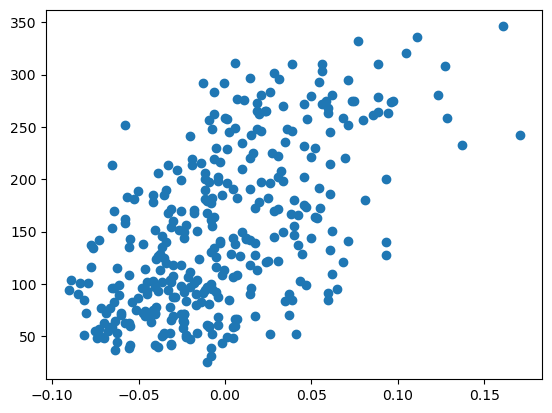

In [6]:
plt.scatter(X_train[:,2],y_train)
plt.show()

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [10]:
lr.intercept_

151.88331005254167

In [11]:
y_pred = lr.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

0.4399338661568969

In [13]:
np.random.randint(0,X_train.shape[0])

10

In [14]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
            self.intercept_ = 0
            self.coef_ = np.ones(X_train.shape[1])
            
            for i in range(self.epochs):
                for j in range(X_train.shape[0]):
                    idr = np.random.randint(0,X_train.shape[0])
                    
                    y_hat = self.intercept_ + np.dot(X_train[idr],self.coef_)
                    
                    intercept_der = -2 * (y_train[idr] - y_hat)
                    self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                    
                    coef_der = -2 * np.dot((y_train[idr] - y_hat),X_train[idr])
                    self.coef_ = self.coef_ - (self.lr * coef_der)
    
    def predict(self,X_test):
        return self.intercept_ + np.dot(X_test,self.coef_)

In [15]:
sgd = SGDRegressor(learning_rate=0.01,epochs=50)

In [16]:
start = time.time()
sgd.fit(X_train,y_train)
print('Time Taken is: ', time.time() - start)

Time Taken is:  0.29894495010375977


In [17]:
sgd.coef_

array([  53.07546597,  -64.41308451,  354.72566272,  245.3808594 ,
         16.80176606,  -26.73736652, -172.34552703,  127.92875111,
        317.02214299,  126.46736395])

In [18]:
sgd.intercept_

151.38057852121142

In [19]:
y_pred1 = sgd.predict(X_test)

In [20]:
r2_score(y_test,y_pred1)

0.4337137056028597

In [21]:
sg = SGDRegressor(max_iter=150,learning_rate='constant',eta0=0.01)

TypeError: SGDRegressor.__init__() got an unexpected keyword argument 'max_iter'

In [ ]:
start = time.time()
sg.fit(X_train,y_train)
print('Time taken is: ',time.time()-start)

In [ ]:
y_pred2 = sg.predict(X_test)

In [ ]:
r2_score(y_test,y_pred2)